> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 


What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reat they will be seeing in the following cell(s).
 der what was found in the preceding cell(s). Try to make it so that the reader can then understand wha

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this s

df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
df.drop(index=99832,inplace=True)

In [34]:
#check for duplicate 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Scheduledtime,Appointmenttime,appointment_month,date_variance
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000,110526
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10.774542,0.0,5.210041,10 days 04:24:39.789370826
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,3.216192,0.0,0.473776,15 days 06:07:14.979140739
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.0,4.000000,-6 days +00:00:00
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.0,5.000000,0 days 00:00:00
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.0,5.000000,4 days 00:00:00
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,0.0,5.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,21.000000,0.0,6.000000,179 days 00:00:00


In [35]:
df.duplicated().sum()

0

In [36]:
df.isnull().sum()

PatientId              0
AppointmentID          0
Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                    0
Neighbourhood          0
Scholarship            0
Hipertension           0
Diabetes               0
Alcoholism             0
Handcap                0
SMS_received           0
no_show                0
ScheduledDate          0
Scheduledtime          0
ScheduledDay_Week      0
AppointmentDate        0
Appointmenttime        0
AppointmentDay_Week    0
appointment_month      0
date_variance          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # COnverting Date from String type to Datetime format
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['Scheduledtime'] = df['ScheduledDay'].dt.hour

df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df['ScheduledDay_Week']=df['ScheduledDay'].dt.date
df['ScheduledDay_Week']=pd.to_datetime(df['ScheduledDay_Week'])
df['ScheduledDay_Week'] = df['ScheduledDay_Week'].dt.day_name()

df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]) ##COnverting Date from String type to Datetime format
df['AppointmentDate'] = df['AppointmentDay'].dt.date
df['Appointmenttime'] = df['AppointmentDay'].dt.hour


df['AppointmentDay_Week']=df['AppointmentDay'].dt.date
df['AppointmentDay_Week']=pd.to_datetime(df['AppointmentDay_Week'])
df['AppointmentDay_Week'] = df['AppointmentDay_Week'].dt.day_name()

df['appointment_month'] = df['AppointmentDay'].dt.month

df['date_variance']=df['AppointmentDate']-df['ScheduledDate'] 
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No-show,ScheduledDate,Scheduledtime,ScheduledDay_Week,AppointmentDate,Appointmenttime,AppointmentDay_Week,appointment_month,date_variance
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,...,1,No,2016-05-03,9,Tuesday,2016-06-07,0,Tuesday,6,35 days
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,...,1,No,2016-05-03,7,Tuesday,2016-06-07,0,Tuesday,6,35 days
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,...,1,No,2016-04-27,16,Wednesday,2016-06-07,0,Tuesday,6,41 days
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,...,1,No,2016-04-27,15,Wednesday,2016-06-07,0,Tuesday,6,41 days
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,...,1,No,2016-04-27,13,Wednesday,2016-06-07,0,Tuesday,6,41 days


In [14]:
df.rename(columns={"No-show":"no_show"},inplace=True)

In [15]:
df["no_show"]=df["no_show"].str.replace('Yes', '1')
df["no_show"]=df["no_show"].str.replace('No', '0')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,no_show,ScheduledDate,Scheduledtime,ScheduledDay_Week,AppointmentDate,Appointmenttime,AppointmentDay_Week,appointment_month,date_variance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,2016-04-29,18,Friday,2016-04-29,0,Friday,4,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,2016-04-29,16,Friday,2016-04-29,0,Friday,4,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,2016-04-29,16,Friday,2016-04-29,0,Friday,4,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,2016-04-29,17,Friday,2016-04-29,0,Friday,4,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,2016-04-29,16,Friday,2016-04-29,0,Friday,4,0 days


In [16]:
object_list=["Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","no_show"]

for c in object_list:
    df[c]=df[c].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientId            110526 non-null  float64            
 1   AppointmentID        110526 non-null  int64              
 2   Gender               110526 non-null  object             
 3   ScheduledDay         110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay       110526 non-null  datetime64[ns, UTC]
 5   Age                  110526 non-null  int64              
 6   Neighbourhood        110526 non-null  object             
 7   Scholarship          110526 non-null  int64              
 8   Hipertension         110526 non-null  int64              
 9   Diabetes             110526 non-null  int64              
 10  Alcoholism           110526 non-null  int64              
 11  Handcap              110526 non-null  int64              
 12  SM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff378aea0b8>,
      dtype=object)

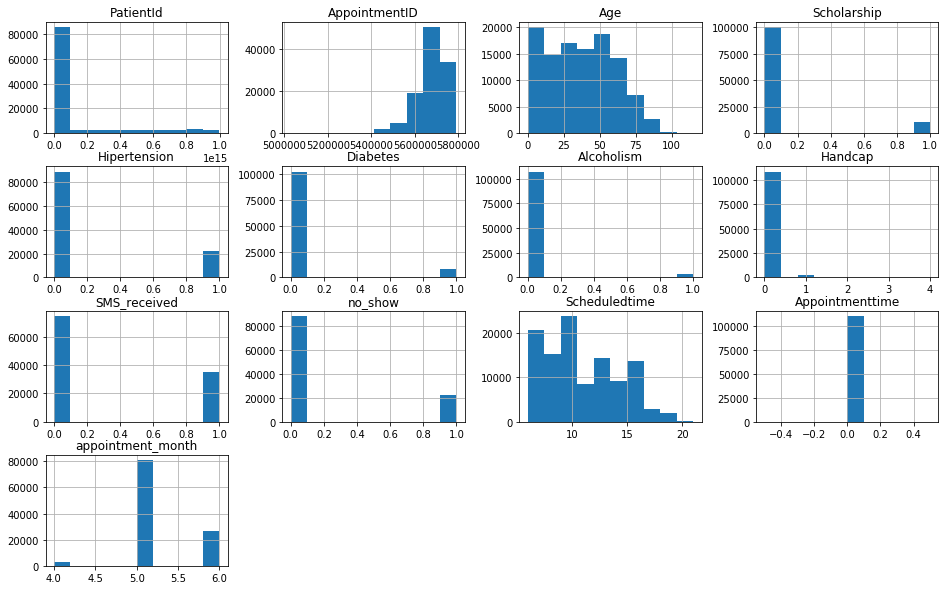

In [17]:
df.hist(figsize=(16,10))


In [18]:
df_noshow=df.query('no_show =="1"')
df_show=df.query('no_show =="0"')

df_show.count(),df_noshow.count()

(PatientId              88207
 AppointmentID          88207
 Gender                 88207
 ScheduledDay           88207
 AppointmentDay         88207
 Age                    88207
 Neighbourhood          88207
 Scholarship            88207
 Hipertension           88207
 Diabetes               88207
 Alcoholism             88207
 Handcap                88207
 SMS_received           88207
 no_show                88207
 ScheduledDate          88207
 Scheduledtime          88207
 ScheduledDay_Week      88207
 AppointmentDate        88207
 Appointmenttime        88207
 AppointmentDay_Week    88207
 appointment_month      88207
 date_variance          88207
 dtype: int64, PatientId              22319
 AppointmentID          22319
 Gender                 22319
 ScheduledDay           22319
 AppointmentDay         22319
 Age                    22319
 Neighbourhood          22319
 Scholarship            22319
 Hipertension           22319
 Diabetes               22319
 Alcoholism             22

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Research Question 1 (the age effect on  show ):

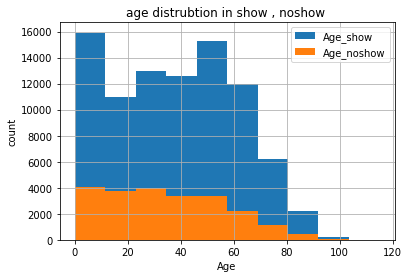

In [19]:
df_show["Age"].hist(),df_noshow["Age"].hist()
plt.title('age distrubtion in show , noshow ')
plt.xlabel("Age")
plt.ylabel('count')
plt.legend(['Age_show', 'Age_noshow'])

### there is a commitment from young children or baby from (0 to around 10 years) also the age from() around 45 to 55)


## Research Question 2( Gender effect on show):

In [20]:
total_female = (df["Gender"]== "F").sum()
total_male =(df["Gender"]== "M").sum()
total_female,total_male
female_show=(df_show["Gender"]=="F").sum()
male_show = (df_show["Gender"]=="M").sum()
female_prop=female_show/total_female
male_prop =male_show/total_male
female_prop,male_prop

(0.7968512924734475, 0.8003205211052808)

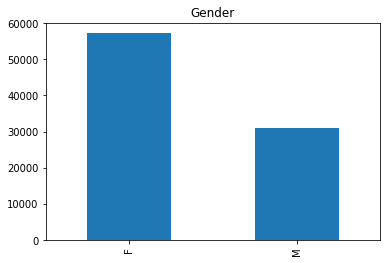

In [21]:
df_show.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

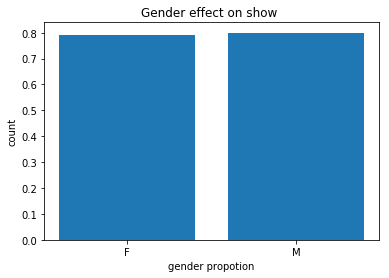

In [22]:

plt.bar([1, 2], [0.79, 0.80 ], tick_label=['F', 'M']);
plt.title('Gender effect on show ')
plt.xlabel("gender propotion")
plt.ylabel('count');

### gender have the same effect on show apointment 

## Research Question 3 ( week_day  effect on show) :

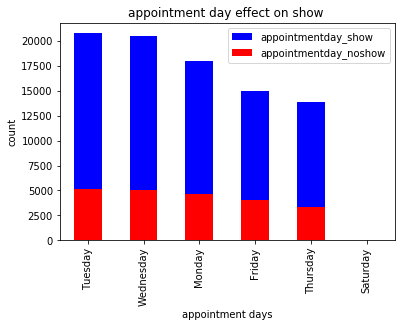

In [23]:
df_show['AppointmentDay_Week'].value_counts().plot(kind='bar',color='blue',label="appointmentday_show")
df_noshow['AppointmentDay_Week'].value_counts().plot(kind='bar',color='red',label="appointmentday_noshow")

plt.title('appointment day effect on show ')
plt.xlabel("appointment days")
plt.ylabel('count');
plt.legend(['appointmentday_show', 'appointmentday_noshow'])

### high show appointment in tuesday and lowest show appointment in saturday the same for no show so the day have no effect on showing 

## Research Question 4 (Appointmentdate effect on show) :

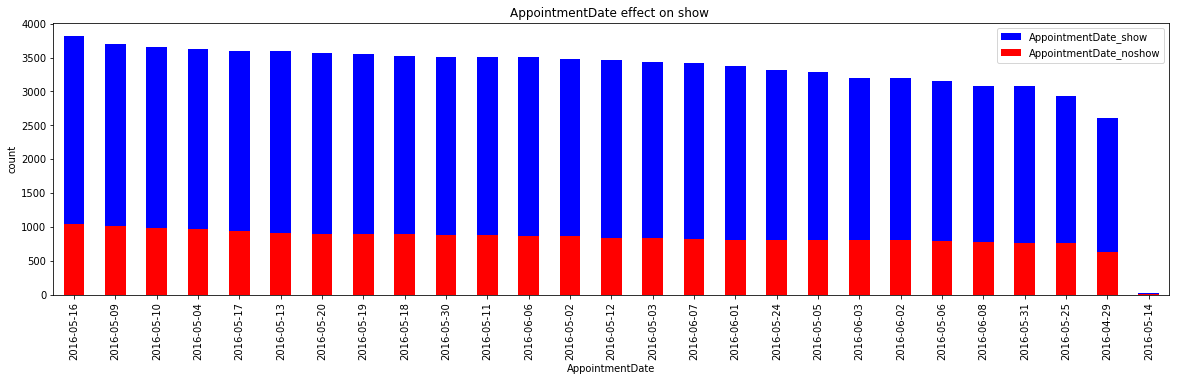

In [24]:
df_show['AppointmentDate'].value_counts().plot(kind='bar',color='blue',label="AppointmentDate",figsize=(20,5))
df_noshow['AppointmentDate'].value_counts().plot(kind='bar',color='red',label="AppointmentDate",figsize=(20,5))

plt.title('AppointmentDate effect on show ')
plt.xlabel("AppointmentDate")
plt.ylabel('count');
plt.legend(['AppointmentDate_show', 'AppointmentDate_noshow'])

### there is no effect of appoinment date on showing 

## Research Question 5 : Date gap effect on show -gap between schedule and appointment date :

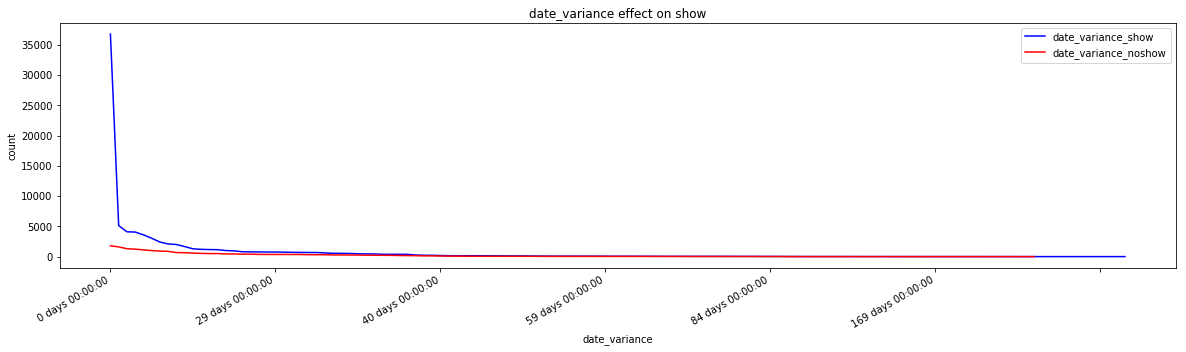

In [25]:
df_show['date_variance'].value_counts().plot(kind='line',color='blue',label="date_variance_show",figsize=(20,5))
df_noshow['date_variance'].value_counts().plot(kind='line',color='red',label="date_variance_noshow",figsize=(20,5))
plt.title('date_variance effect on show')
plt.xlabel("date_variance")
plt.ylabel('count');
plt.legend(['date_variance_show', 'date_variance_noshow'])


### if patient not attend in thier schadule date so the propability of show will severly decrease 

## Research Question 6 ( month effect on show ):

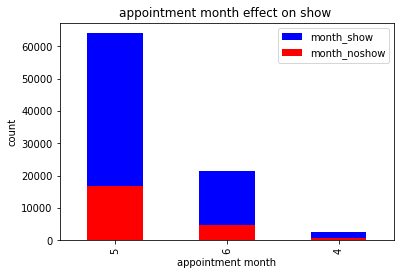

In [37]:
df_show["appointment_month"].value_counts().plot(kind="bar",color='blue',label="month_show"),
df_noshow["appointment_month"].value_counts().plot(kind="bar",color='red',label="month_noshow")

plt.title('appointment month effect on show ')
plt.xlabel("appointment month")
plt.ylabel('count');
plt.legend(['month_show', 'month_noshow'])

### month have no effect on show patient

##  Research Question 7 ( location effect on show ) :

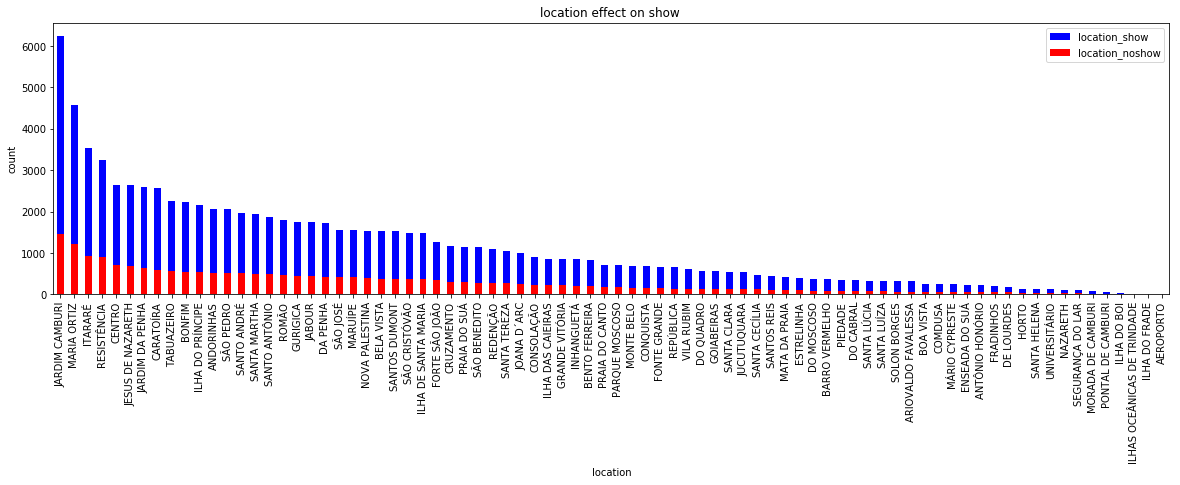

In [27]:
df_show.Neighbourhood.value_counts().plot(kind="bar",color='blue',label='location_show',figsize=(20,5))
df_noshow.Neighbourhood.value_counts().plot(kind="bar",color='red',label='location_noshow',figsize=(20,5))
plt.title('location effect on show ')
plt.xlabel("location")
plt.ylabel('count');
plt.legend(['location_show', 'location_noshow'])


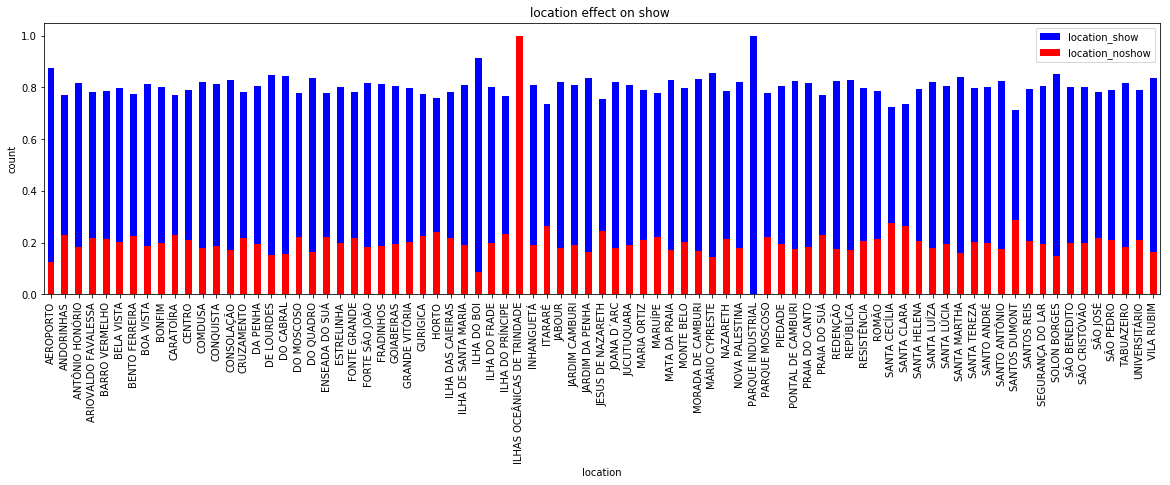

In [21]:
((df_show["Neighbourhood"]).value_counts()/(df["Neighbourhood"]).value_counts()).plot(kind="bar",color='blue',label='location_show',figsize=(20,5))
((df_noshow["Neighbourhood"]).value_counts()/(df["Neighbourhood"]).value_counts()).plot(kind="bar",color='red',label='location_show',figsize=(20,5))
plt.title('location effect on show ')
plt.xlabel("location")
plt.ylabel('count');
plt.legend(['location_show', 'location_noshow'])


### after checking the amount of comitted patient to attend according to thier loaction , found that PARQUE DE CAMBURI have high response , and LIHAS OCEANICAS DE TRINDADE have the lowest response to attend ,also lLHA DO BOI have a high response to attend 


## Research Question 8 ( the sms effect on show ):

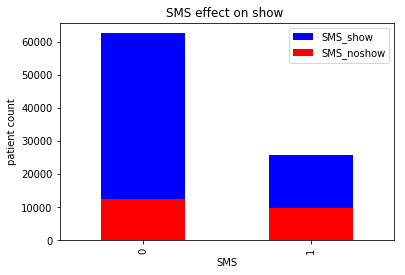

In [28]:
df_show["SMS_received"].value_counts().plot(kind="bar",color='blue',label="SMS_show"),
df_noshow["SMS_received"].value_counts().plot(kind="bar",color='red',label="SMS_noshow")

plt.title('SMS effect on show ')
plt.xlabel("SMS")
plt.ylabel('patient count');
plt.legend(['SMS_show', 'SMS_noshow'])

### paitient who not recived sms have high attending precentage than who recived sms
### meaing that sms not affected on show precentage 

## Research Question 9 ( the effect of location with age on show ):

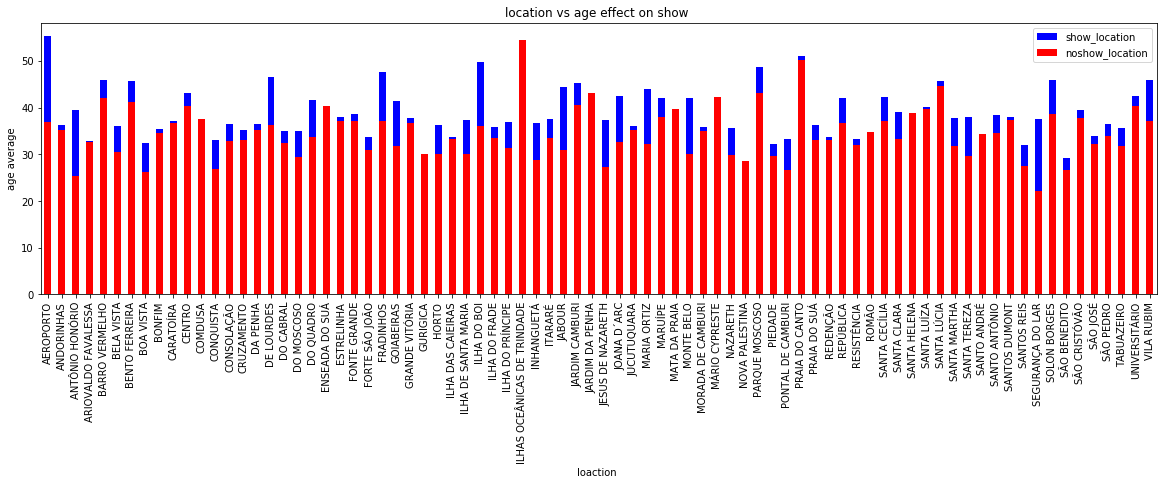

In [29]:
df_show.groupby("Neighbourhood").Age.mean().plot(kind='bar',color='blue',label='show_location',figsize=(20,5))
df_noshow.groupby("Neighbourhood").Age.mean().plot(kind='bar',color='red',label='noshow_location',figsize=(20,5))
plt.title('location vs age effect on show ')
plt.xlabel("loaction ")
plt.ylabel('age average');
plt.legend(['show_location', 'noshow_location'])


### there are a correlation between age and location so we can predect according on the age and loction the probabiltity of show 
### for example age average of show patientin AEROPORTO around 37 to 57 years 

## Research Question 10 ( Disease effect on show ):

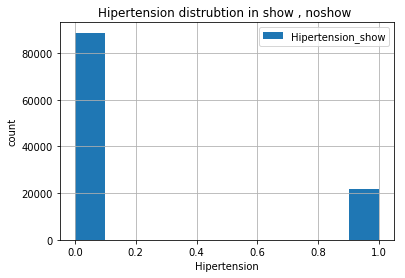

In [39]:
df["Hipertension"].hist()
plt.title('Hipertension distrubtion in show ')
plt.xlabel("Hipertension")
plt.ylabel('count')
plt.legend(['Hipertension_show', 'Hipertension_noshow'])

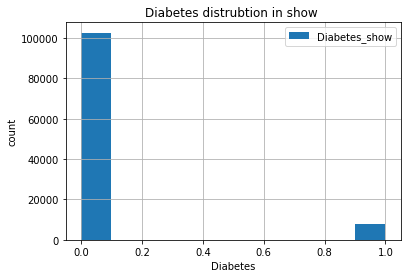

In [40]:
df["Diabetes"].hist()
plt.title('Diabetes distrubtion in show ')
plt.xlabel("Diabetes")
plt.ylabel('count')
plt.legend(['Diabetes_show', 'Diabetes_noshow'])

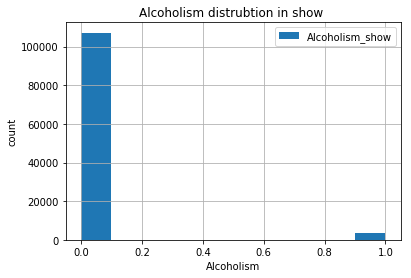

In [41]:
df["Alcoholism"].hist()
plt.title('Alcoholism distrubtion in show ')
plt.xlabel("Alcoholism")
plt.ylabel('count')
plt.legend(['Alcoholism_show', 'Alcoholism_noshow'])

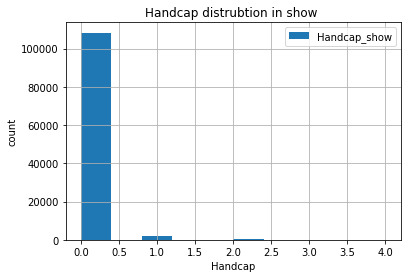

In [42]:
df["Handcap"].hist()
plt.title('Handcap distrubtion in show ')
plt.xlabel("Handcap")
plt.ylabel('count')
plt.legend(['Handcap_show', 'Handcap_noshow'])

### there is no effect of disess on showin up

## Research Question 11 (scholarship effect) :

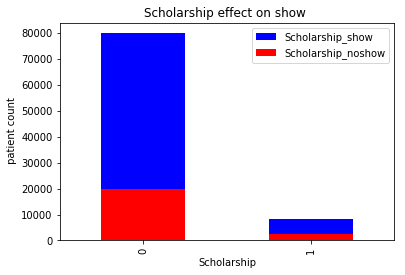

In [43]:
df_show["Scholarship"].value_counts().plot(kind="bar",color='blue',label="Scholarship_show"),
df_noshow["Scholarship"].value_counts().plot(kind="bar",color='red',label="Scholarship_noshow")

plt.title('Scholarship effect on show ')
plt.xlabel("Scholarship")
plt.ylabel(' patient count');
plt.legend(['Scholarship_show', 'Scholarship_noshow'])

### Scholarship have no effect on show 

<a id='conclusions'></a>
## Conclusions

> - there is a commitment from young children or baby from (0 to around 10 years) also the age from(around 45 to 55)

>- gender have the same effect on show apointment so we cant use this varible to predict the showing up

>- high show appointment in tuesday and lowest show appointment in saturday وthe same for no show so the day have no effect on showing up.

>- there is no effect of appoinment date and month on showing up.

>- if patient not attend in thier schaduleي date so the propability of show will severly decrease , that mean we can check if ther gap between the schaduled date and appointmentdate that mean the propability of showing up will be decreased .

>- paitient who not recived SMS have a high attending precentage than who recived SMS, Receiving an SMS did not increase the chance that the patient would show to their appointment.

>- After checking the amount of comitted patient to attend according to thier loaction , found that PARQUE DE CAMBURI have high response , and LIHAS OCEANICAS DE TRINDADE have the lowest response to attend ,also lLHA DO BOI have a high response to attend 

>- there are a correlation between age and location so we can predect according on the age and loction the probabiltity of show for example age average of show patient in AEROPORTO around 37 to 57 years 

>- there is no effect of disess and scholarship on showing up


### limitations
>The period when the data collected was just nearly Three months, and this short period 

>SMS_received columns weren't explained clearly on the dataset page.

>Data Wrangling : i droped the raw of age (-1) that not logic even if for baby to have -1 year

>I extracted the day from schedule and appointment date to check their effect on show 
>turning yes /no if (no show) column to 0/1 to be easily during analysis by determine the mean

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0